In [81]:
import numpy as np 
import numpy.random as rand
import matplotlib.pyplot as plt
from PIL import Image

# Forward Process

In [113]:
T=500
IMG_SIZE=128

betas=np.linspace(start=0.0001, stop=0.02, num=T)
alphas=1-betas
alphas_cumprod=np.cumprod(alphas)
sqrt_alphas_cumprod=np.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod=np.sqrt(1-alphas_cumprod)

def forward_diffusion_process(x0, t):
    """
    Get noisy image of x0 obtained after t timesteps
    """
    noise=rand.standard_normal(size=x0.shape)
    return sqrt_alphas_cumprod[t]*x0+sqrt_one_minus_alphas_cumprod[t]*noise, noise

# Reduces image resolution
def transform_img(image : Image):
    """
    Horizontal flips given image with random probability
    and scales it to values between -1 and 1.
    """
    image.thumbnail((IMG_SIZE,IMG_SIZE))
    prob=rand.random()

    if prob>0.5:
        image=image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

    img_arr=np.array(image).astype(np.float32)

    #Scale between -1 and 1
    img_arr=2*img_arr/255-1

    return img_arr

def reverse_transform_img(img_arr):
    """
    Given an image array scales it back to valid RGB
    """
    img_arr=(img_arr+1)/2
    img_arr*=255
    img_arr=np.array(img_arr).astype(np.uint8)
    return img_arr


### Example

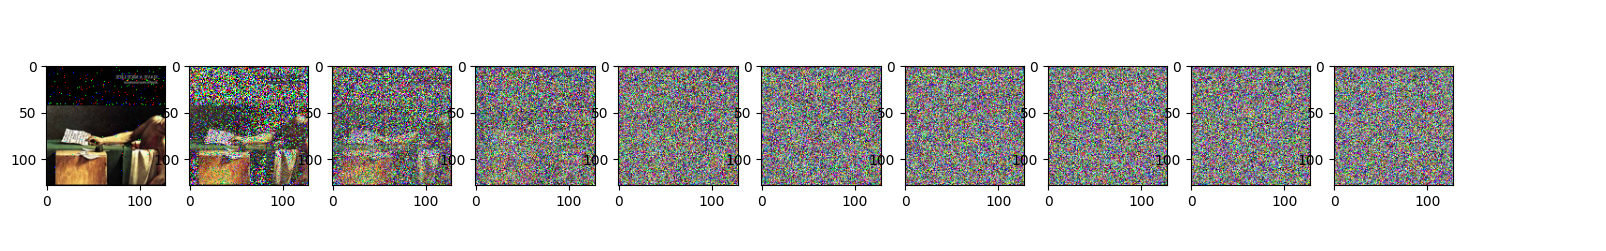

In [114]:
im=Image.open("test_img.jpg")
img=transform_img(im)

plt.figure(figsize=(20,3))
plt.axis('off')
num_images = 10
stepsize = int(T/num_images)

for t in range(0, T, stepsize):
    plt.subplot(1, num_images+1, int(t/stepsize) + 1)
    noisy_img, noise = forward_diffusion_process(img, t)
    noisy_img=reverse_transform_img(noisy_img)
    plt.imshow(noisy_img)